## CardioCare: Web-Based Heart Disease Prediction System

age:			age <br>
sex:			1: male, 0: female <br>
cp:			    chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic <br>
trestbps:		resting blood pressure <br>
chol:			serum cholestoral in mg/dl <br>
fbs:			fasting blood sugar > 120 mg/dl <br>
restecg:		resting electrocardiographic results (values 0,1,2) <br>
thalach:		maximum heart rate achieved <br>
exang:			exercise induced angina <br>
oldpeak:		oldpeak = ST depression induced by exercise relative to rest <br>
slope:			the slope of the peak exercise ST segment <br>
ca:			    number of major vessels (0-3) colored by flourosopy <br>
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect <br>

### Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Understanding our Dataset

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(303, 14)

In [5]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3,1
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
105,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2,0
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Analysing the 'target' variable

In [8]:
df['target'].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

Clearly this information show us this is a classification problem, with the target variable having value '0' and '1'.

### Checking Correlation between columns

In [9]:
print(df.corr()['target'].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

### Exploratory Data Analysis (EDA)

In [10]:
df['target'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

target
1    165
0    138
Name: count, dtype: int64


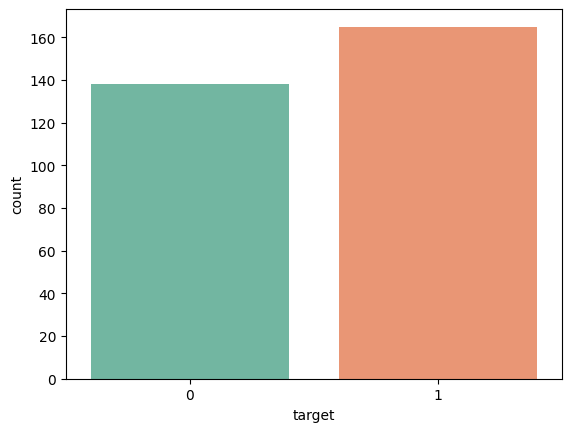

In [11]:
y = df['target']

sns.countplot(x=y, palette='Set2')

target_temp = df['target'].value_counts()
print(target_temp)

In [12]:
print(f"Percentage of patience without heart problems: {str(round(target_temp[0]*100/303, 2))}")
print(f"Percentage of patience with heart problems: {str(round(target_temp[1]*100/303, 2))}")

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


Now we'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

#### Analysing the 'Sex' feature

In [13]:
df['sex'].unique()

array([1, 0], dtype=int64)

We notice, that as expected, the 'sex' feature has 2 unique features

<Axes: xlabel='sex', ylabel='target'>

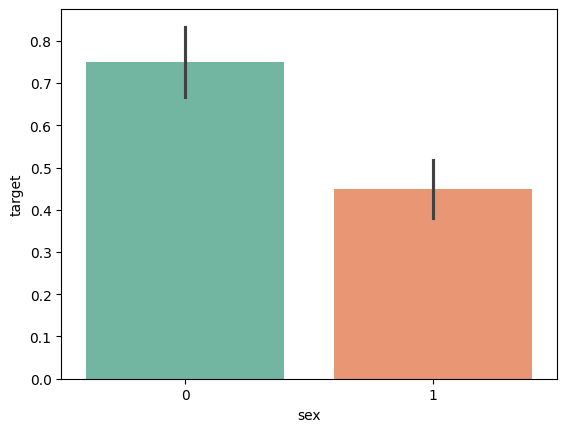

In [14]:
sns.barplot(x=df['sex'], y=y, palette='Set2')

We notice, that female are more likely to have heart problems than males

#### Analysing the 'Chest Pain Type' feature

In [15]:
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

As expected, the CP feature has values from 0 to 3

<Axes: xlabel='cp', ylabel='target'>

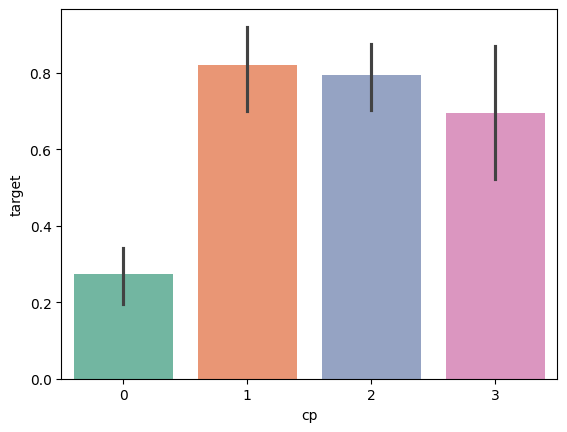

In [16]:
sns.barplot(x=df['cp'], y=y, palette='Set2')

cp:			    chest pain type, 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic

We notice, that chest pain of "0", i.e. the one with typical angina are much less likely to have heart problems.

#### Analysing the FBS feature

In [17]:
df['fbs'].unique()

array([1, 0], dtype=int64)

In [18]:
df['fbs'].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

fasting blood sugar > 120 mg/dl

<Axes: xlabel='fbs', ylabel='target'>

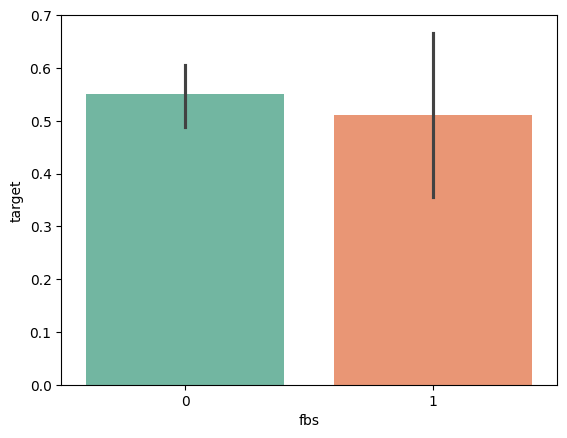

In [19]:
sns.barplot(x=df['fbs'], y=y, palette='Set2')

Nothing extraordinary here

#### Analysing the restecg feature

In [20]:
df['restecg'].unique()

array([0, 1, 2], dtype=int64)

<Axes: xlabel='restecg', ylabel='target'>

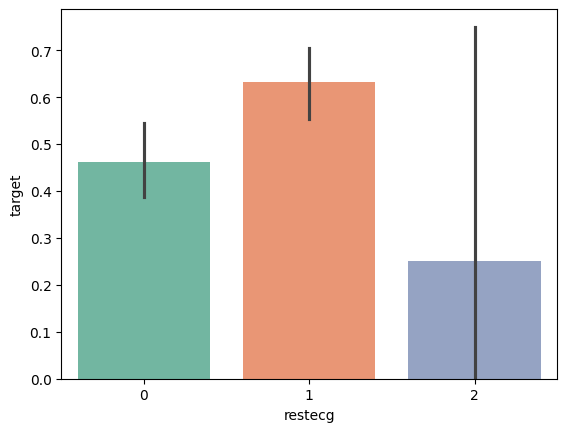

In [21]:
sns.barplot(x=df['restecg'], y=y, palette='Set2')

We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'.

#### Analysing the 'exang' feature

In [22]:
df['exang'].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='exang', ylabel='target'>

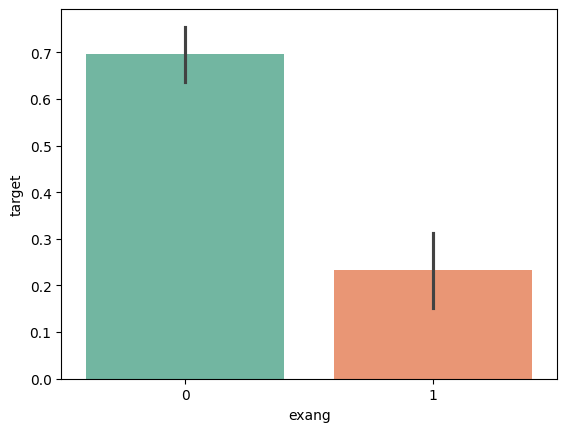

In [23]:
sns.barplot(x=df['exang'], y=y, palette='Set2')

exang:			exercise induced angina

People with exang = 1 i.e. Exercise induced angina are much less likely to have heart problems.

#### Analysing the Slope Feature

In [24]:
df['slope'].unique()

array([0, 2, 1], dtype=int64)

<Axes: xlabel='slope', ylabel='target'>

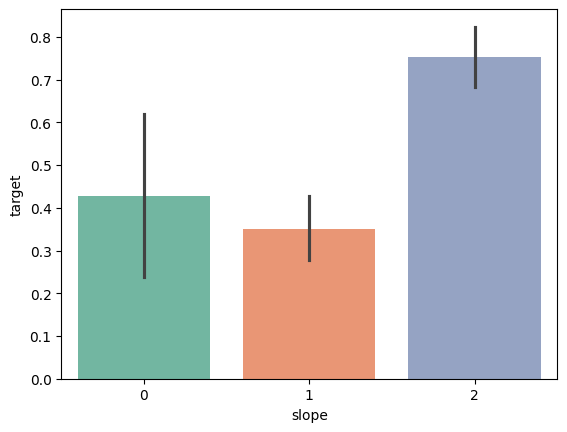

In [25]:
sns.barplot(x=df['slope'], y=y, palette='Set2')

We observe that Slope '2' cause heart pain much more than Slope '0' and '1'.

#### Analysing the 'ca' feature

In [26]:
df['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

ca:			    number of major vessels (0-3) colored by flourosopy

<Axes: xlabel='ca', ylabel='count'>

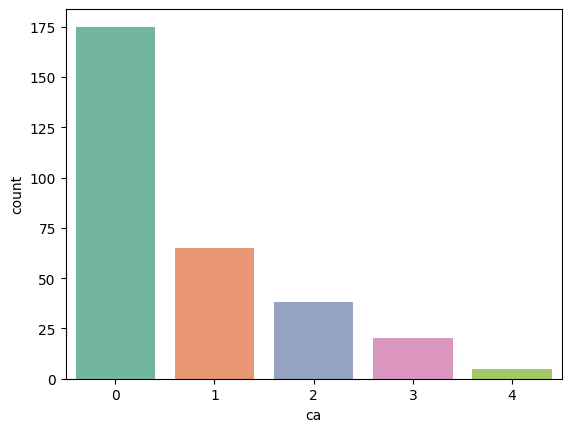

In [27]:
sns.countplot(x=df['ca'], palette='Set2')

<Axes: xlabel='ca', ylabel='target'>

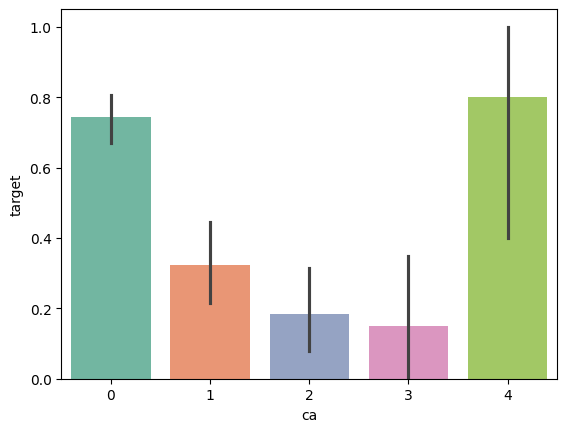

In [28]:
sns.barplot(x=df['ca'], y=y, palette='Set2')

ca=4 has astonishingly large number of heart patients

#### Analysing the 'thal' feature

In [29]:
df['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

<Axes: xlabel='thal', ylabel='target'>

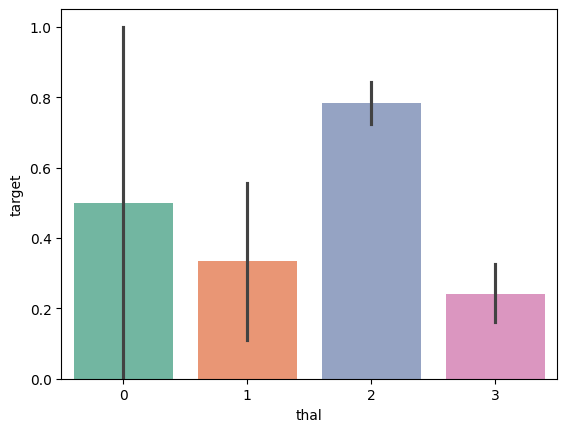

In [30]:
sns.barplot(x=df['thal'], y=y, palette='Set2')

<Axes: ylabel='Density'>

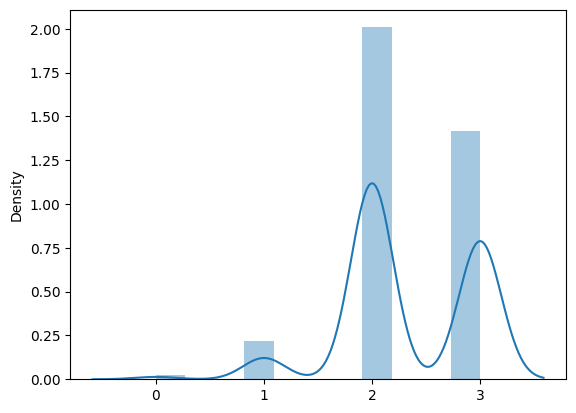

In [31]:
sns.distplot(x=df['thal'])

### Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [33]:
X_train.shape

(242, 13)

In [34]:
X_test.shape

(61, 13)

In [35]:
y_train.shape

(242,)

In [36]:
y_test.shape

(61,)

### Model Fitting

In [37]:
from sklearn.metrics import accuracy_score

#### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [39]:
y_pred_lr.shape

(61,)

In [40]:
score_lr = round(accuracy_score(y_pred_lr, y_test)*100,2)
print(f"The accuracy score achieved using Logistic Regression is: {str(score_lr)} %")

The accuracy score achieved using Logistic Regression is: 85.25 %


#### Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [42]:
y_pred_nb.shape

(61,)

In [43]:
score_nb = round(accuracy_score(y_pred_nb, y_test)*100,2)
print(f"The accuracy score achieved using Naive Bayes is: {str(score_nb)} %")

The accuracy score achieved using Naive Bayes is: 85.25 %


#### SVM

In [44]:
from sklearn import svm

sv = svm.SVC(kernel='linear')
sv.fit(X_train, y_train)
y_pred_svm = sv.predict(X_test)

In [45]:
y_pred_svm.shape

(61,)

In [46]:
score_svm = round(accuracy_score(y_pred_svm, y_test)*100,2)
print(f"The accuracy score achieved using Linear SVM is: {str(score_svm)} %")

The accuracy score achieved using Linear SVM is: 81.97 %


#### K Nearest Neighbors

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

In [48]:
y_pred_knn.shape

(61,)

In [49]:
score_knn = round(accuracy_score(y_pred_knn, y_test)*100,2)
print(f'The accuracy score achieved using KNN is: {str(score_knn)} %')

The accuracy score achieved using KNN is: 67.21 %


#### Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

In [51]:
y_pred_dt.shape

(61,)

In [52]:
score_dt = round(accuracy_score(y_pred_dt, y_test)*100,2)
print(f"The accuracy score achieved using Decision Tree is: {str(score_dt)} %")

The accuracy score achieved using Decision Tree is: 81.97 %


#### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [56]:
y_pred_rf.shape

(61,)

In [57]:
score_rf = round(accuracy_score(y_pred_rf, y_test)*100,2)
print(f"The accuracy score achieved using Decision Tree is: {str(score_rf)} %")

The accuracy score achieved using Decision Tree is: 90.16 %


#### XGBoost

In [58]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

In [59]:
y_pred_xgb.shape

(61,)

In [60]:
score_xgb = round(accuracy_score(y_pred_xgb, y_test)*100,2)
print(f'The accuracy score achieved using XGBoost is: {str(score_xgb)} %')

The accuracy score achieved using XGBoost is: 78.69 %


#### Neural Network

In [61]:
from keras.models import Sequential
from keras.layers import Dense

In [62]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=13))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
model.fit(X_train, y_train, epochs=300)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5379 - loss: 32.7402
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5356 - loss: 27.8292  
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5201 - loss: 24.8848  
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5068 - loss: 20.0327  
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5394 - loss: 15.6893 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5428 - loss: 11.6032 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4563 - loss: 9.1662 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3887 - loss: 7.9990 
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4106 - loss: 7.8374 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4011 - loss: 8.4917  
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4381 - loss: 7.0572 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3

In [64]:
y_pred_nn = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [65]:
y_pred_nn.shape

(61, 1)

In [66]:
rounded = [round(x[0]) for x in y_pred_nn]
y_pred_nn = rounded

In [67]:
score_nn = round(accuracy_score(y_pred_nn, y_test)*100,2)
print(f"The accuracy score achieved using Neural Network is: {str(score_nn)} %")

The accuracy score achieved using Neural Network is: 83.61 %


In [68]:
scores = [score_lr, score_nb, score_svm, score_knn, score_dt, score_rf, score_xgb, score_nn]
algorithm = ['Logistic Regression', 'Naive Bayes', 'Support Vector Machine', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'XGBoost', 'Neural Network']

for i in range(len(algorithm)):
    print(f"The accuracy of score achieved using {algorithm[i]} is {str(scores[i])} %")

The accuracy of score achieved using Logistic Regression is 85.25 %
The accuracy of score achieved using Naive Bayes is 85.25 %
The accuracy of score achieved using Support Vector Machine is 81.97 %
The accuracy of score achieved using K-Nearest Neighbors is 67.21 %
The accuracy of score achieved using Decision Tree is 81.97 %
The accuracy of score achieved using Random Forest is 90.16 %
The accuracy of score achieved using XGBoost is 78.69 %
The accuracy of score achieved using Neural Network is 83.61 %


<Axes: xlabel='Algorithm', ylabel='Accuracy Score'>

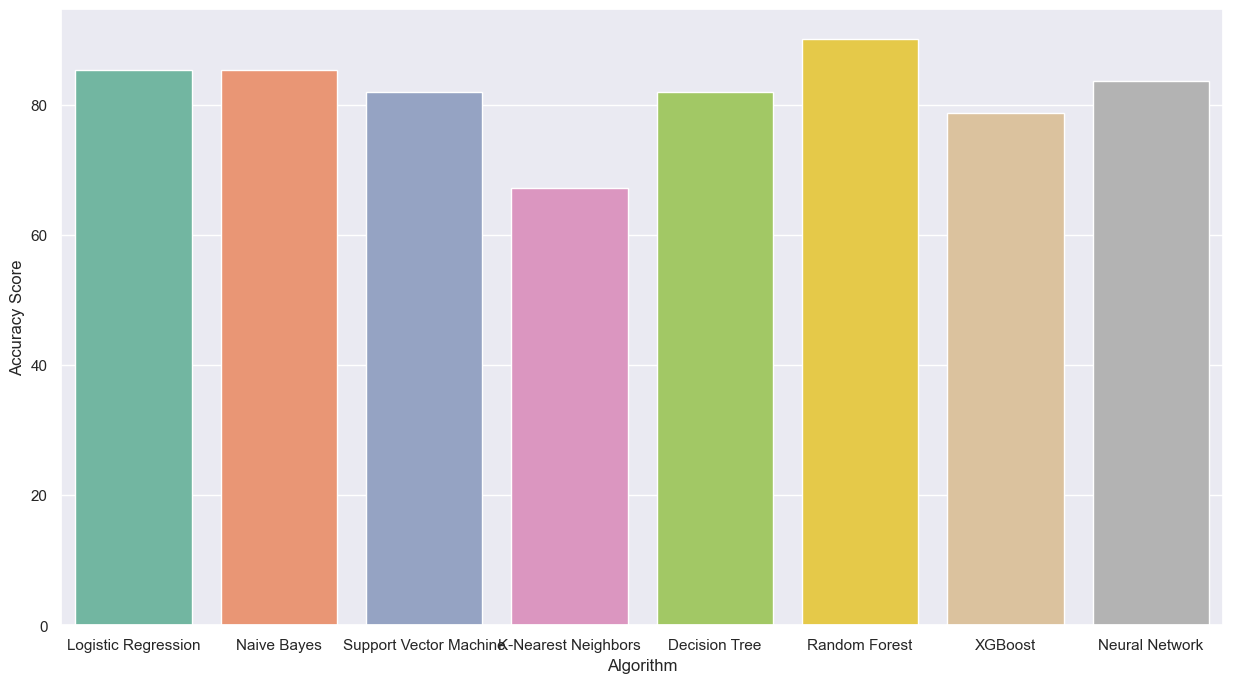

In [69]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithm")
plt.ylabel("Accuracy Score")

sns.barplot(x=algorithm, y=scores, palette='Set2')

So as we can see random forest give us a best score so wo deploy Random Forest model for our web prediction.

In [70]:
import pickle

pickle.dump(rf, open("model_rf.pkl", "wb"))
print("Model Dump Successfull")

Model Dump Successfull


In [71]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [73]:
data = {'age': [45],'sex': [1],'cp':[2],'trestbps':[110],'chol':[287],'fbs':[1],'restecg':[0],'thalach':[163],'exang':[1],'oldpeak':[2.4],'slope':[2],'ca':[1],'thal':[1]}  # Assuming you want to predict for age 45
df_1 = pd.DataFrame(data)

# Use the predict method to predict the target variable
prediction = rf.predict(df_1)

print("Predicted outcome:", prediction)

Predicted outcome: [0]


In [74]:
age = 45
sex = 1
cp = 2
trestbps = 110
chol = 287
fbs = 1
restecg = 0
thalach = 163
exang = 1
oldpeak = 2.4
slope = 2
ca = 1
thal = 1
Z = np.array([age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]).reshape(1,-1)

prediction_2 = rf.predict(Z)

print("Predicted outcome:", prediction)


Predicted outcome: [0]


In [75]:
print(Z)

[[ 45.    1.    2.  110.  287.    1.    0.  163.    1.    2.4   2.    1.
    1. ]]
